# 비지도 학습
- 고양이인지 강아지인지 모르는 상태
- 타겟을 모르는 사진을 종류별로 분류하려 할 때

## 군집 알고리즘
- 비슷한 특성을 묶어서 알려줘라 라고 할거임
- 특성을 찾아내는 것으로 클러스터링이라고도 한다

In [1]:
import numpy as np
import matplotlib.pyplot as plt
fruits = np.load('data/fruits_300.npy')
fruits.shape

(300, 100, 100)

- 3차원 데이터이다!
![사진들로이루어진데이터예시](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQrC1y0CPOQRH95GkvJYDDA3LynULA4SemGTMFZEF5HDdFLG5YBMhQTInBExhzjQeX5vgQ&usqp=CAU)
- 100x100으로 이루어진 사진 300장

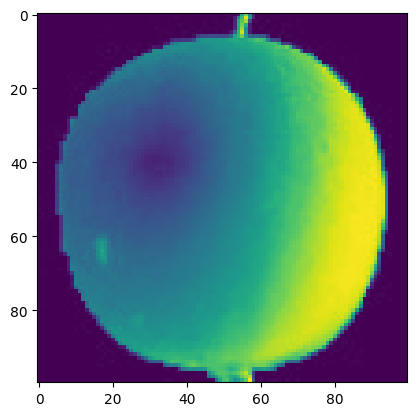

In [2]:
plt.imshow(fruits[0])
plt.show()

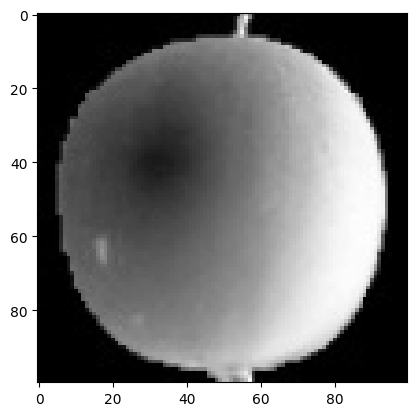

In [6]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

- 우리의 관심사는 사과 자체이고 사과를 이루는 데이터는 숫자가 0,1이 아닌 더 높은 숫자로 이루어져있을것임
- 컴퓨터도 마찬가지로 0,1에 중요도를 낮추고 이는 사람눈에 검정색으로 보임

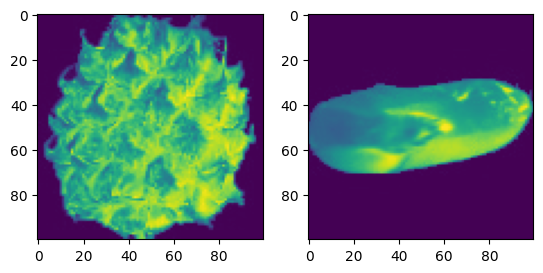

In [8]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[111])
axs[1].imshow(fruits[222])
plt.show()

- 이렇게 2차원 배열로 된 데이터를 일렬로 나열할 수도 있고 이렇게 만들어진 2차원배열 데이터와 1차원배열 데이터는 같은 데이터라고 컴퓨터는 인식한다

In [9]:
print(fruits[0:100].shape)
print(fruits[0:100].reshape(-1, 100*100)) # 100*100이라고 정해줬으니까 (-1==)알아서 해줘

(100, 100, 100)
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [11]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)
# 100*100 == 10000 개의 특성(columns)가 생긴거다

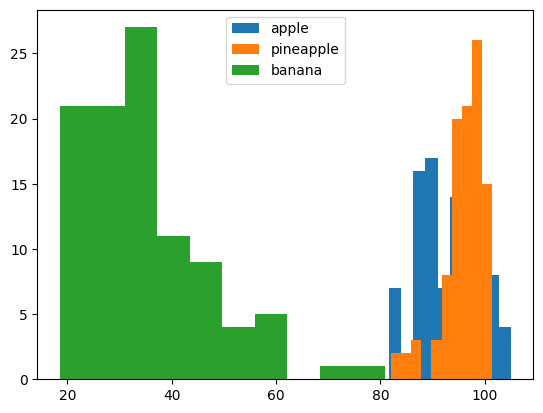

In [14]:
plt.hist(np.mean(apple, axis=1))
plt.hist(np.mean(pineapple, axis=1))
plt.hist(np.mean(banana, axis=1))
plt.legend(['apple', 'pineapple', 'banana'])

In [19]:
# 평균값과 가까운 사진 고르기
# 시각화 하기위해서 일렬로 나열한 데이터를 다시 2차원 사진으로 만들고 진행한다
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))

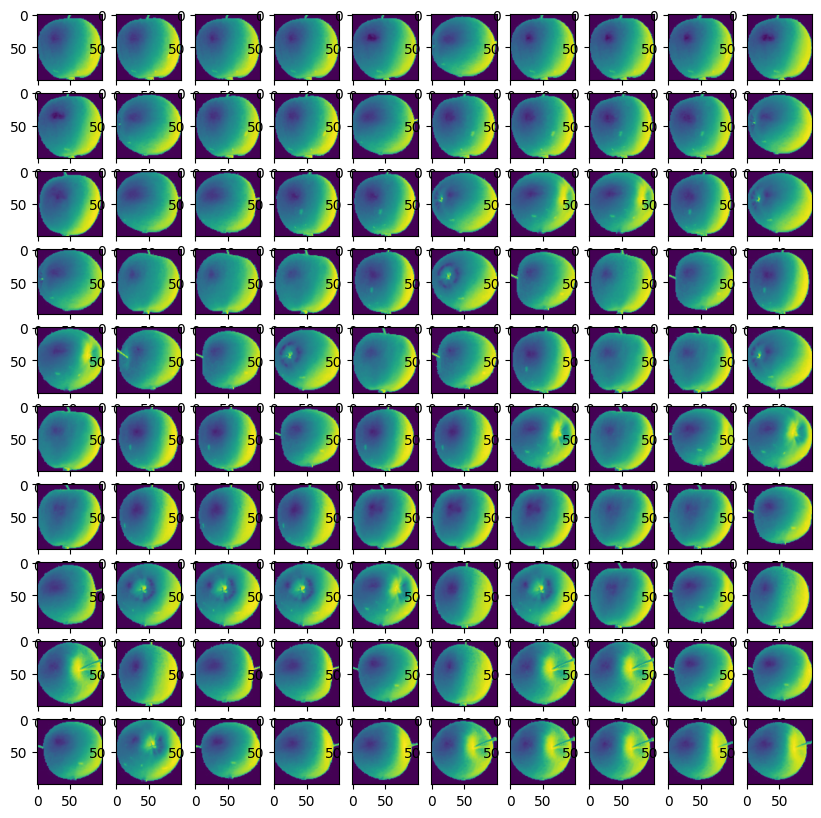

In [18]:
apple_index = np.argsort(abs_mean)[0:100]

fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]])

plt.show()

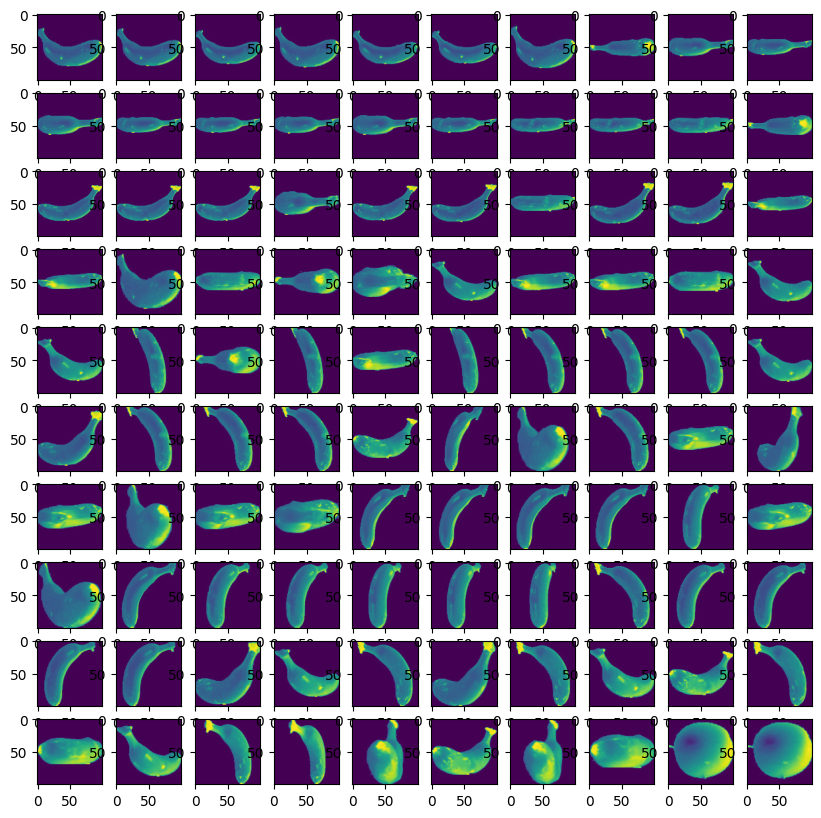

In [21]:
# np.abs(fruits - pineapple_mean)
np.abs(fruits - banana_mean) # 바나나 값을 빼서 300장의 사진의 값이 바뀐거지 사진 갯수가 줄어든건 아니다
abs_diff_b = np.abs(fruits - banana_mean)
abs_mean_b = np.mean(abs_diff_b, axis=(1, 2)) # axis : 첫번째 축과 두번째 축을 기준으로 평균값을 구해달라는 의미

banana_index = np.argsort(abs_mean_b)[0:100]

fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10 + j]])

plt.show()